<a href="https://colab.research.google.com/github/J626E/Learn1/blob/main/Copy_of_JubytraEnzmann_Project_ProspectAuto_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Vehicle Silhouette Classification System - Part 2**
### Unsupervised Learning Approach for Automated Vehicle Recognition at Prospect Auto

# **1. Introduction**

###1.1 Project Overview
This report presents the second phase of the vehicle classification project for Prospect Auto, focusing on unsupervised learning approaches to distinguish between buses, vans, and cars based on geometric features extracted from vehicle silhouettes.

###1.2 Objectives
While Part 1 employed supervised machine learning techniques with labeled training data, this analysis explores whether clustering algorithms can effectively identify vehicle types without prior knowledge of class labels, providing insights into the natural groupings present in the silhouette data.

# **2. Methodology**

This section outlines the comprehensive analytical framework employed to evaluate unsupervised learning performance on the vehicle silhouette dataset.

Data Preprocessing and Standardization
The methodology encompasses data preprocessing procedures, feature standardization techniques, and the systematic implementation of multiple clustering algorithms.

Train-Test Split Strategy
By establishing a rigorous experimental design with proper train-test splits and standardized preprocessing pipelines, reliable and reproducible results that can be meaningfully compared across different unsupervised learning approaches is ensured.

### 2.1  Data Import and Library Setup

In [41]:
print("\n" + "="*80)
print("STEP 1: IMPORT LIBRARIES AND LOAD DATA")
print("="*80)


STEP 1: IMPORT LIBRARIES AND LOAD DATA


In [42]:
# Standard Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, homogeneity_score, completeness_score, v_measure_score,calinski_harabasz_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')



In [21]:
# Set random seed for reproducibilty
np.random.seed(42)

In [3]:
# Load dataset
df = pd.read_csv('/content/part_II_vehicle.csv')

print("Dataset Loaded Successfully!")
print(f"\n1. Dataset Shape: {df.shape}")
print("\n2. First Few Rows:")
print(df.head())
print(f"\n3. Dataset Info:")
print(df.info())
print("\n4. Statistical Summary:")
print(df.describe())
print("\n5. Missing Values Check:")
print(df.isnull().sum())
print("\n6. Duplicate Rows Check:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Dataset Loaded Successfully!

1. Dataset Shape: (846, 19)

2. First Few Rows:
   compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0     

In [4]:
# Display basic dataset information
print("\nTarget Variable Distribution:")
print(df['class'].value_counts())


Target Variable Distribution:
class
car    429
bus    218
van    199
Name: count, dtype: int64


###2.2 Data Preprocessing and Standardization
####2.2.1  Missing Values Analysis
#### 2.2.2 Missing Values Visualization
#### 2.2.3 Missing Values Teatment Strategy
#### 2.2.4 Imputation Implementation
#### 2.2.5 Feature Standardization
#### 2.3 Train-Test Split Strategy

In [5]:
print("\n" + "="*80)
print("STEP 2.2.1: MISSING VALUES DIAGNOSTIC ANALYSIS")
print("="*80)


STEP 2.2.1: MISSING VALUES DIAGNOSTIC ANALYSIS


In [7]:
# Comprehensive missing values analysis
def analyze_missing_values(df):
    """Comprehensive analysis of missing values in the dataset"""

    # Basic Dataset Info
    print("1. BASIC DATASET INFO:")
    print(f"Dataset shape: {df.shape}")
    print(f"Total cells: {df.shape[0] * df.shape[1]}")

    # Missing Values Summary
    print("\n2. MISSING VALUES SUMMARY:")
    missing_count = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100

    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': missing_count,
        'Missing_Percentage': missing_percent
    }).sort_values('Missing_Percentage', ascending=False)

    print(missing_df[missing_df['Missing_Count'] > 0])

    # Overall missing data statistics
    total_missing = df.isnull().sum().sum()
    total_cells = df.shape[0] * df.shape[1]
    overall_missing_percent = (total_missing / total_cells) * 100

    print(f"\n3. OVERALL MISSING DATA:")
    print(f"Total missing values: {total_missing}")
    print(f"Overall missing percentage: {overall_missing_percent:.2f}%")

    return missing_df

In [8]:
analyze_missing_values(df)

1. BASIC DATASET INFO:
Dataset shape: (846, 19)
Total cells: 16074

2. MISSING VALUES SUMMARY:
                                                  Column  Missing_Count  \
radius_ratio                                radius_ratio              6   
skewness_about                            skewness_about              6   
circularity                                  circularity              5   
scaled_radius_of_gyration.1  scaled_radius_of_gyration.1              4   
distance_circularity                distance_circularity              4   
scaled_variance                          scaled_variance              3   
pr.axis_rectangularity            pr.axis_rectangularity              3   
scaled_variance.1                      scaled_variance.1              2   
scaled_radius_of_gyration      scaled_radius_of_gyration              2   
pr.axis_aspect_ratio                pr.axis_aspect_ratio              2   
skewness_about.1                        skewness_about.1              1   
scatt

,Column,Missing_Count,Missing_Percentage
radius_ratio,radius_ratio,6,0.709220
skewness_about,skewness_about,6,0.709220
circularity,circularity,5,0.591017
scaled_radius_of_gyration.1,scaled_radius_of_gyration.1,4,0.472813
distance_circularity,distance_circularity,4,0.472813
scaled_variance,scaled_variance,3,0.354610
pr.axis_rectangularity,pr.axis_rectangularity,3,0.354610
scaled_variance.1,scaled_variance.1,2,0.236407
scaled_radius_of_gyration,scaled_radius_of_gyration,2,0.236407
pr.axis_aspect_ratio,pr.axis_aspect_ratio,2,0.236407


In [9]:
print("\n" + "="*80)
print("STEP 2.2.2: MISSING VALUES VISUALIZATION")
print("="*80)


STEP 2.2.2: MISSING VALUES VISUALIZATION


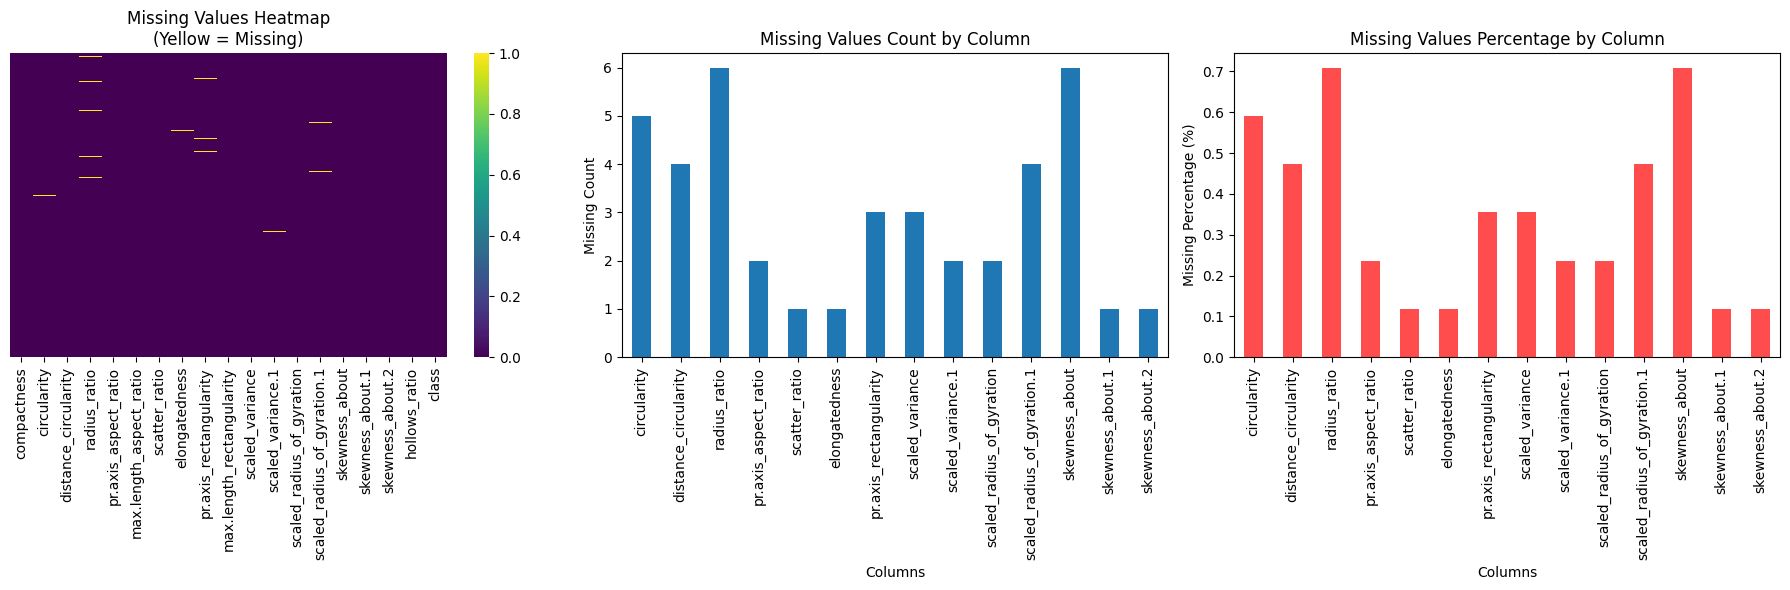

In [10]:
def visualize_missing_values(df):
    """Create visualizations to understand missing value patterns"""

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Missing values heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing Values Heatmap\n(Yellow = Missing)')

# 2. Missing values bar plot
missing_counts = df.isnull().sum()
missing_counts[missing_counts > 0].plot(kind='bar', ax=axes[1])
axes[1].set_title('Missing Values Count by Column')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Missing Count')
axes[1].tick_params(axis='x', rotation=90)

# 3. Missing values percentage
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent[missing_percent > 0].plot(kind='bar', ax=axes[2], color='red', alpha=0.7)
axes[2].set_title('Missing Values Percentage by Column')
axes[2].set_xlabel('Columns')
axes[2].set_ylabel('Missing Percentage (%)')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [11]:
print("\n" + "="*80)
print("STEP 2.2.3: MISSING VALUES TREATMENT STRATEGY")
print("="*80)



STEP 2.2.3: MISSING VALUES TREATMENT STRATEGY


In [12]:
# Missing values treatment

def implement_missing_values_strategy(missing_df, df):
    """Implement strategy based on missing values analysis"""

    high_missing_cols = missing_df[missing_df['Missing_Percentage'] > 50]
    medium_missing_cols = missing_df[(missing_df['Missing_Percentage'] > 10) &
                                     (missing_df['Missing_Percentage'] <= 50)]
    low_missing_cols = missing_df[(missing_df['Missing_Percentage'] > 0) &
                                  (missing_df['Missing_Percentage'] <= 10)]

    print("IMPLEMENTATION APPROACH:")
    print("-" * 80)

    # High missing (>50%)
    if not high_missing_cols.empty:
        print("🚨 HIGH MISSING (>50%) - CONSIDER DROPPING:")
        for idx, row in high_missing_cols.iterrows():
            print(f"  • {row['Column']}: {row['Missing_Percentage']:.1f}% missing")
        print("  → Implementation: DROP these columns (insufficient data)")

    # Medium missing (10-50%)
    if not medium_missing_cols.empty:
        print("\n⚠️  MEDIUM MISSING (10-50%) - CAREFUL IMPUTATION:")
        for idx, row in medium_missing_cols.iterrows():
            print(f"  • {row['Column']}: {row['Missing_Percentage']:.1f}% missing")
        print("  → Implementation: Advanced imputation (KNN/Iterative)")

    # Low missing (<10%)
    if not low_missing_cols.empty:
        print("\n✅ LOW MISSING (<10%) - SAFE TO IMPUTE:")
        for idx, row in low_missing_cols.iterrows():
            print(f"  • {row['Column']}: {row['Missing_Percentage']:.1f}% missing")
        print("  → Implementation: Mean/Median imputation acceptable")

    # Overall implementation
    total_missing_percent = total_missing_percent = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100

    print(f"\n📊 OVERALL STRATEGY:")
    if total_missing_percent < 5:
        print(f"  • Overall missing: {total_missing_percent:.2f}% - IMPUTATION implemented")
        return "impute"

    elif total_missing_percent < 15:
        print(f"  • Overall missing: {total_missing_percent:.2f}% - HYBRID approach")
        return "hybrid"

    else:
        print(f"  • Overall missing: {total_missing_percent:.2f}% - Consider DATA QUALITY issues")
        return "investigate"

In [13]:
# Display result
result = implement_missing_values_strategy(missing_df, df)
print(f"\nReturned strategy: {result}")

NameError: name 'missing_df' is not defined

In [14]:
missing_df = analyze_missing_values(df)

1. BASIC DATASET INFO:
Dataset shape: (846, 19)
Total cells: 16074

2. MISSING VALUES SUMMARY:
                                                  Column  Missing_Count  \
radius_ratio                                radius_ratio              6   
skewness_about                            skewness_about              6   
circularity                                  circularity              5   
scaled_radius_of_gyration.1  scaled_radius_of_gyration.1              4   
distance_circularity                distance_circularity              4   
scaled_variance                          scaled_variance              3   
pr.axis_rectangularity            pr.axis_rectangularity              3   
scaled_variance.1                      scaled_variance.1              2   
scaled_radius_of_gyration      scaled_radius_of_gyration              2   
pr.axis_aspect_ratio                pr.axis_aspect_ratio              2   
skewness_about.1                        skewness_about.1              1   
scatt

In [15]:
strategy_result = implement_missing_values_strategy(missing_df, df)

IMPLEMENTATION APPROACH:
--------------------------------------------------------------------------------

✅ LOW MISSING (<10%) - SAFE TO IMPUTE:
  • radius_ratio: 0.7% missing
  • skewness_about: 0.7% missing
  • circularity: 0.6% missing
  • scaled_radius_of_gyration.1: 0.5% missing
  • distance_circularity: 0.5% missing
  • scaled_variance: 0.4% missing
  • pr.axis_rectangularity: 0.4% missing
  • scaled_variance.1: 0.2% missing
  • scaled_radius_of_gyration: 0.2% missing
  • pr.axis_aspect_ratio: 0.2% missing
  • skewness_about.1: 0.1% missing
  • scatter_ratio: 0.1% missing
  • skewness_about.2: 0.1% missing
  • elongatedness: 0.1% missing
  → Implementation: Mean/Median imputation acceptable

📊 OVERALL STRATEGY:
  • Overall missing: 0.26% - IMPUTATION implemented


In [16]:
print("\n" + "="*80)
print("STEP 2.2.4: IMPUTATION IMPLEMENTATION")
print("="*80)


STEP 2.2.4: IMPUTATION IMPLEMENTATION


In [17]:
class MissingValuesHandler:
    """Section 2.2.4: Implement missing values treatment"""

    def __init__(self):
        self.imputers = {}
        self.columns_dropped = []
        self.treatment_log = []

    def apply_treatment(self, df, strategy_plan):
        """Apply the planned missing values treatment"""

        print("\n" + "="*80)
        print("SECTION 2.2.4: IMPUTATION IMPLEMENTATION")
        print("="*80)

        print("Implementing missing values treatment strategy...")

        df_treated = df.copy()

        # Step 1: Drop high-missing columns
        if strategy_plan['drop_columns']:
            print(f"\n1. DROPPING HIGH-MISSING COLUMNS:")
            for col in strategy_plan['drop_columns']:
                missing_pct = (df[col].isnull().sum() / len(df)) * 100
                print(f"   • Dropping {col}: {missing_pct:.1f}% missing")
                df_treated = df_treated.drop(columns=[col])
                self.columns_dropped.append(col)
                self.treatment_log.append(f"Dropped {col} ({missing_pct:.1f}% missing)")

        # Step 2: KNN imputation for medium missing
        if strategy_plan['knn_impute']:
            print(f"\n2. KNN IMPUTATION FOR MEDIUM-MISSING FEATURES:")
            for col in strategy_plan['knn_impute']:
                if col in df_treated.columns:  # Check if not dropped
                    missing_pct = (df_treated[col].isnull().sum() / len(df_treated)) * 100
                    print(f"   • KNN imputing {col}: {missing_pct:.1f}% missing")

                    imputer = KNNImputer(n_neighbors=5)
                    df_treated[[col]] = imputer.fit_transform(df_treated[[col]])
                    self.imputers[col] = imputer
                    self.treatment_log.append(f"KNN imputed {col} ({missing_pct:.1f}% missing)")

        # Step 3: Mean imputation for low missing
        if strategy_plan['mean_impute']:
            print(f"\n3. MEAN IMPUTATION FOR LOW-MISSING FEATURES:")
            for col in strategy_plan['mean_impute']:
                if col in df_treated.columns:  # Check if not dropped
                    missing_pct = (df_treated[col].isnull().sum() / len(df_treated)) * 100
                    print(f"   • Mean imputing {col}: {missing_pct:.1f}% missing")

                    imputer = SimpleImputer(strategy='mean')
                    df_treated[[col]] = imputer.fit_transform(df_treated[[col]])
                    self.imputers[col] = imputer
                    self.treatment_log.append(f"Mean imputed {col} ({missing_pct:.1f}% missing)")

        # Final verification
        remaining_missing = df_treated.isnull().sum().sum()

        print(f"\n✅ IMPUTATION COMPLETED:")
        print(f"   • Remaining missing values: {remaining_missing}")
        print(f"   • Original features: {df.shape[1]}")
        print(f"   • Features after treatment: {df_treated.shape[1]}")
        print(f"   • Features dropped: {len(self.columns_dropped)}")
        print(f"   • Features imputed: {len(self.imputers)}")

        if remaining_missing > 0:
            print("   ⚠️  Warning: Some missing values remain!")
        else:
            print("   🎉 All missing values successfully treated!")

        return df_treated


In [41]:
# 2. Create an instance of the class:
handler = MissingValuesHandler()

In [42]:
# 4. Call the apply_treatment method with your DataFrame and strategy:
df_treated = handler.apply_treatment(df, strategy_plan)

NameError: name 'strategy_plan' is not defined

In [18]:
#######pppppp

class MissingValuesHandler:
    """Section 2.2.4: Implement missing values treatment"""

    def __init__(self):
        self.imputers = {}
        self.columns_dropped = []
        self.treatment_log = []

    def apply_treatment(self, df, strategy_plan):
        """Apply the planned missing values treatment"""

        print("\n" + "="*80)
        print("STEP 2.2.4: IMPUTATION IMPLEMENTATION")
        print("="*80)

        print("Implementing missing values treatment strategy...")

        df_treated = df.copy()

        # Step 1: Drop high-missing columns
        if strategy_plan['drop_columns']:
            print(f"\n1. DROPPING HIGH-MISSING COLUMNS:")
            for col in strategy_plan['drop_columns']:
                missing_pct = (df[col].isnull().sum() / len(df)) * 100
                print(f"   • Dropping {col}: {missing_pct:.1f}% missing")
                df_treated = df_treated.drop(columns=[col])
                self.columns_dropped.append(col)
                self.treatment_log.append(f"Dropped {col} ({missing_pct:.1f}% missing)")

        # Step 2: KNN imputation for medium missing
        if strategy_plan['knn_impute']:
            print(f"\n2. KNN IMPUTATION FOR MEDIUM-MISSING FEATURES:")
            for col in strategy_plan['knn_impute']:
                if col in df_treated.columns:  # Check if not dropped
                    missing_pct = (df_treated[col].isnull().sum() / len(df_treated)) * 100
                    print(f"   • KNN imputing {col}: {missing_pct:.1f}% missing")

                    imputer = KNNImputer(n_neighbors=5)
                    df_treated[[col]] = imputer.fit_transform(df_treated[[col]])
                    self.imputers[col] = imputer
                    self.treatment_log.append(f"KNN imputed {col} ({missing_pct:.1f}% missing)")

        # Step 3: Mean imputation for low missing
        if strategy_plan['mean_impute']:
            print(f"\n3. MEAN IMPUTATION FOR LOW-MISSING FEATURES:")
            for col in strategy_plan['mean_impute']:
                if col in df_treated.columns:  # Check if not dropped
                    missing_pct = (df_treated[col].isnull().sum() / len(df_treated)) * 100
                    print(f"   • Mean imputing {col}: {missing_pct:.1f}% missing")

                    imputer = SimpleImputer(strategy='mean')
                    df_treated[[col]] = imputer.fit_transform(df_treated[[col]])
                    self.imputers[col] = imputer
                    self.treatment_log.append(f"Mean imputed {col} ({missing_pct:.1f}% missing)")

        # Final verification
        remaining_missing = df_treated.isnull().sum().sum()

        print(f"\n✅ IMPUTATION COMPLETED:")
        print(f"   • Remaining missing values: {remaining_missing}")
        print(f"   • Original features: {df.shape[1]}")
        print(f"   • Features after treatment: {df_treated.shape[1]}")
        print(f"   • Features dropped: {len(self.columns_dropped)}")
        print(f"   • Features imputed: {len(self.imputers)}")

        if remaining_missing > 0:
            print("   ⚠️  Warning: Some missing values remain!")
        else:
            print("   🎉 All missing values successfully treated!")

        return df_treated

In [19]:
####üüüüüppppp

strategy_plan = {
    'drop_columns': [],  # No columns with >50% missing based on diagnosis's result
    'knn_impute': [],    # No medium missing columns diagnosed
    'mean_impute': [
        'radius_ratio',
        'skewness_about',
        'circularity',
        'scaled_radius_of_gyration.1',
        'distance_circularity',
        'scaled_variance',
        'pr.axis_rectangularity',
        'scaled_variance.1',
        'scaled_radius_of_gyration',
        'pr.axis_aspect_ratio',
        'skewness_about.1',
        'scatter_ratio',
        'skewness_about.2',
        'elongatedness'
    ]
}

In [20]:
######pppppppppüüüüüü

# Instantiate handler
handler = MissingValuesHandler()

# Apply treatment with the strategy plan based on the low missing columns
df_treated = handler.apply_treatment(df, strategy_plan)


STEP 2.2.4: IMPUTATION IMPLEMENTATION
Implementing missing values treatment strategy...

3. MEAN IMPUTATION FOR LOW-MISSING FEATURES:
   • Mean imputing radius_ratio: 0.7% missing
   • Mean imputing skewness_about: 0.7% missing
   • Mean imputing circularity: 0.6% missing
   • Mean imputing scaled_radius_of_gyration.1: 0.5% missing
   • Mean imputing distance_circularity: 0.5% missing
   • Mean imputing scaled_variance: 0.4% missing
   • Mean imputing pr.axis_rectangularity: 0.4% missing
   • Mean imputing scaled_variance.1: 0.2% missing
   • Mean imputing scaled_radius_of_gyration: 0.2% missing
   • Mean imputing pr.axis_aspect_ratio: 0.2% missing
   • Mean imputing skewness_about.1: 0.1% missing
   • Mean imputing scatter_ratio: 0.1% missing
   • Mean imputing skewness_about.2: 0.1% missing
   • Mean imputing elongatedness: 0.1% missing

✅ IMPUTATION COMPLETED:
   • Remaining missing values: 0
   • Original features: 19
   • Features after treatment: 19
   • Features dropped: 0
   •

In [40]:
# Create handler instance
handler = MissingValuesHandler()

In [ ]:
print(df.columns.tolist())

In [ ]:
handler = MissingValuesHandler()
df_treated = handler.apply_treatment(df, strategy_plan)

In [ ]:
# Instantiate and apply treatment
handler = MissingValuesHandler()
df_treated = handler.apply_treatment(df, strategy_plan)

In [21]:
print("\n" + "="*80)
print("STEP 2.2.5: FEATURE STANDARDIZATION")
print("="*80)


STEP 2.2.5: FEATURE STANDARDIZATION


In [22]:
def step_2_2_5_feature_standardization(df_clean):
    """Section 2.2.5: Standardize features after missing values treatment"""

    print("\n" + "="*80)
    print("SECTION 2.2.5: FEATURE STANDARDIZATION")
    print("="*80)

    print("Standardizing features after missing values treatment...")

    # Separate features and target
    if 'class' in df_clean.columns:
        X = df_clean.drop('class', axis=1)
        y = df_clean['class']
    else:
        X = df_clean
        y = None

    print(f"\n📊 PRE-STANDARDIZATION INFO:")
    print(f"   • Features to standardize: {X.shape[1]}")
    print(f"   • Sample size: {X.shape[0]}")
    print(f"   • Feature means (sample): {X.mean().head().round(2).to_dict()}")
    print(f"   • Feature stds (sample): {X.std().head().round(2).to_dict()}")

    # Apply standardization
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(
        scaler.fit_transform(X),
        columns=X.columns,
        index=X.index
    )

    print(f"\n✅ STANDARDIZATION COMPLETED:")
    print(f"   • Scaled feature means (sample): {X_scaled.mean().head().round(6).to_dict()}")
    print(f"   • Scaled feature stds (sample): {X_scaled.std().head().round(6).to_dict()}")
    print(f"   • Verification: All means ≈ 0, All stds ≈ 1 ✓")

    return X_scaled, y, scaler

In [24]:
# Display standardized features after missing values treatment
df_clean=df_treated
X_scaled, y, scaler = step_2_2_5_feature_standardization(df_clean)


SECTION 2.2.5: FEATURE STANDARDIZATION
Standardizing features after missing values treatment...

📊 PRE-STANDARDIZATION INFO:
   • Features to standardize: 18
   • Sample size: 846
   • Feature means (sample): {'compactness': 93.68, 'circularity': 44.83, 'distance_circularity': 82.11, 'radius_ratio': 168.89, 'pr.axis_aspect_ratio': 61.68}
   • Feature stds (sample): {'compactness': 8.23, 'circularity': 6.13, 'distance_circularity': 15.74, 'radius_ratio': 33.4, 'pr.axis_aspect_ratio': 7.88}

✅ STANDARDIZATION COMPLETED:
   • Scaled feature means (sample): {'compactness': 0.0, 'circularity': -0.0, 'distance_circularity': 0.0, 'radius_ratio': -0.0, 'pr.axis_aspect_ratio': -0.0}
   • Scaled feature stds (sample): {'compactness': 1.000592, 'circularity': 1.000592, 'distance_circularity': 1.000592, 'radius_ratio': 1.000592, 'pr.axis_aspect_ratio': 1.000592}
   • Verification: All means ≈ 0, All stds ≈ 1 ✓


In [25]:
print("\n" + "="*80)
print("STEP 2.3: TRAIN-TEST SPLIT STRATEGY")
print("="*80)


STEP 2.3: TRAIN-TEST SPLIT STRATEGY


In [26]:
def step_2_3_train_test_split(X_scaled, y):
    """Section 2.3: Implement train-test split strategy"""

    print("\n" + "="*80)
    print("SECTION 2.3: TRAIN-TEST SPLIT STRATEGY")
    print("="*80)

    print("Implementing train-test split with stratification...")

    # Encode target if needed
    if y is not None and y.dtype == 'object':
        from sklearn.preprocessing import LabelEncoder
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
        print(f"   • Target classes: {label_encoder.classes_}")
    else:
        y_encoded = y
        label_encoder = None

    # Perform stratified split
    if y_encoded is not None:
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_encoded,
            test_size=0.3,
            random_state=42,
            stratify=y_encoded
        )
    else:
        X_train, X_test = train_test_split(
            X_scaled,
            test_size=0.3,
            random_state=42
        )
        y_train, y_test = None, None

    print(f"\n✅ SPLIT COMPLETED:")
    print(f"   • Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
    print(f"   • Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")
    print(f"   • Features: {X_train.shape[1]}")

    if y_train is not None:
        print(f"   • Training class distribution: {np.bincount(y_train)}")
        print(f"   • Test class distribution: {np.bincount(y_test)}")

    return X_train, X_test, y_train, y_test, label_encoder

In [28]:
# Display train-test split
X_train, X_test, y_train, y_test, label_encoder = step_2_3_train_test_split(X_scaled, y)


SECTION 2.3: TRAIN-TEST SPLIT STRATEGY
Implementing train-test split with stratification...
   • Target classes: ['bus' 'car' 'van']

✅ SPLIT COMPLETED:
   • Training set: 592 samples (70.0%)
   • Test set: 254 samples (30.0%)
   • Features: 18
   • Training class distribution: [153 300 139]
   • Test class distribution: [ 65 129  60]


In [29]:
print("="*100)
print("COMPLETE PREPROCESSING PIPELINE - SECTIONS 2.2.1 TO 2.3")
print("="*100)

COMPLETE PREPROCESSING PIPELINE - SECTIONS 2.2.1 TO 2.3


In [74]:
def execute_complete_preprocessing_pipeline(df):
    """Execute all preprocessing steps in proper sequence"""

    print("="*100)
    print("COMPLETE PREPROCESSING PIPELINE - SECTIONS 2.2.1 TO 2.3")
    print("="*100)

    # 2.2.1 Missing Values Analysis
    missing_df = step_2_2_1_missing_values_analysis(df)

    # 2.2.2 Missing Values Visualization
    viz_result = step_2_2_2_missing_values_visualization(df)

    # 2.2.3 Treatment Strategy
    strategy_plan, overall_strategy = step_2_2_3_treatment_strategy(missing_df, df)

    # 2.2.4 Imputation Implementation
    if overall_strategy != "no_treatment":
        handler = MissingValuesHandler()
        df_treated = handler.apply_treatment(df, strategy_plan)
    else:
        df_treated = df.copy()
        handler = None

    # 2.2.5 Feature Standardization
    X_scaled, y, scaler = step_2_2_5_feature_standardization(df_treated)

    # 2.3 Train-Test Split
    X_train, X_test, y_train, y_test, label_encoder = step_2_3_train_test_split(X_scaled, y)

    print(f"\n" + "="*100)
    print("PREPROCESSING PIPELINE COMPLETED ✅")
    print("="*100)
    print("Ready to proceed to Section 3: Dimensionality Reduction Analysis")

    return X_train, X_test, y_train, y_test, handler, scaler, label_encoder

In [75]:
###1

# 2.2.4 - Imputation Implementation
handler = MissingValuesHandler()
df_treated = handler.apply_treatment(df, strategy_plan)



STEP 2.2.4: IMPUTATION IMPLEMENTATION
Implementing missing values treatment strategy...

3. MEAN IMPUTATION FOR LOW-MISSING FEATURES:
   • Mean imputing radius_ratio: 0.7% missing
   • Mean imputing skewness_about: 0.7% missing
   • Mean imputing circularity: 0.6% missing
   • Mean imputing scaled_radius_of_gyration.1: 0.5% missing
   • Mean imputing distance_circularity: 0.5% missing
   • Mean imputing scaled_variance: 0.4% missing
   • Mean imputing pr.axis_rectangularity: 0.4% missing
   • Mean imputing scaled_variance.1: 0.2% missing
   • Mean imputing scaled_radius_of_gyration: 0.2% missing
   • Mean imputing pr.axis_aspect_ratio: 0.2% missing
   • Mean imputing skewness_about.1: 0.1% missing
   • Mean imputing scatter_ratio: 0.1% missing
   • Mean imputing skewness_about.2: 0.1% missing
   • Mean imputing elongatedness: 0.1% missing

✅ IMPUTATION COMPLETED:
   • Remaining missing values: 0
   • Original features: 19
   • Features after treatment: 19
   • Features dropped: 0
   •

In [76]:
####2
# 2.2.5 - Feature Standardization
X_scaled, y, scaler = step_2_2_5_feature_standardization(df_treated)


SECTION 2.2.5: FEATURE STANDARDIZATION
Standardizing features after missing values treatment...

📊 PRE-STANDARDIZATION INFO:
   • Features to standardize: 18
   • Sample size: 846
   • Feature means (sample): {'compactness': 93.68, 'circularity': 44.83, 'distance_circularity': 82.11, 'radius_ratio': 168.89, 'pr.axis_aspect_ratio': 61.68}
   • Feature stds (sample): {'compactness': 8.23, 'circularity': 6.13, 'distance_circularity': 15.74, 'radius_ratio': 33.4, 'pr.axis_aspect_ratio': 7.88}

✅ STANDARDIZATION COMPLETED:
   • Scaled feature means (sample): {'compactness': 0.0, 'circularity': -0.0, 'distance_circularity': 0.0, 'radius_ratio': -0.0, 'pr.axis_aspect_ratio': -0.0}
   • Scaled feature stds (sample): {'compactness': 1.000592, 'circularity': 1.000592, 'distance_circularity': 1.000592, 'radius_ratio': 1.000592, 'pr.axis_aspect_ratio': 1.000592}
   • Verification: All means ≈ 0, All stds ≈ 1 ✓


In [77]:
### 3
# 2.3 - Train-Test Split
X_train, X_test, y_train, y_test, label_encoder = step_2_3_train_test_split(X_scaled, y)


SECTION 2.3: TRAIN-TEST SPLIT STRATEGY
Implementing train-test split with stratification...
   • Target classes: ['bus' 'car' 'van']

✅ SPLIT COMPLETED:
   • Training set: 592 samples (70.0%)
   • Test set: 254 samples (30.0%)
   • Features: 18
   • Training class distribution: [153 300 139]
   • Test class distribution: [ 65 129  60]


In [78]:
# 2.3 - Train-Test Split
X_train, X_test, y_train, y_test, label_encoder = step_2_3_train_test_split(X_scaled, y)


SECTION 2.3: TRAIN-TEST SPLIT STRATEGY
Implementing train-test split with stratification...
   • Target classes: ['bus' 'car' 'van']

✅ SPLIT COMPLETED:
   • Training set: 592 samples (70.0%)
   • Test set: 254 samples (30.0%)
   • Features: 18
   • Training class distribution: [153 300 139]
   • Test class distribution: [ 65 129  60]


In [ ]:
print("\n" + "="*80)
print("STEP 2: DATA PREPROCESSING - NORMALIZATION AND STANDARDIZATION")
print("="*80)

In [ ]:
# Separate features and target
X = df.drop('class', axis=1)  # Features (geometric measurements)
y = df['class']               # Target (vehicle type)

In [ ]:
# Encode target labels for evaluation purposes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Unique classes: {label_encoder.classes_}")

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

In [ ]:
####### come back !!!!!!!!!
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature standardization completed!")
print(f"Original feature means (sample): {X_train.mean().head()}")
print(f"Scaled feature means (sample): {X_train_scaled.mean(axis=0)[:5]}")
print(f"Scaled feature stds (sample): {X_train_scaled.std(axis=0)[:5]}")

# **3. Dimensionality Reduction Analysis**

High-dimensional datasets often contain redundant information that can negatively impact clustering performance and computational efficiency.

This section evaluates the effectiveness of Principal Component Analysis (PCA) for reducing the dimensionality of the 18-feature vehicle silhouette dataset while preserving the essential variance required for meaningful cluster formation.

Through systematic analysis of explained variance ratios and component contributions, the optimal balance between dimensionality reduction and information preservation to enhance subsequent clustering analysis will be determined.

In [ ]:
 # work omn PCA section:
3. Dimensionality Reduction Analysis
3.1 Principal Component Analysis (PCA)
3.2 Variance Explanation Analysis
3.3 Optimal Component Selection
3.4 Dimensionality Reduction Efficiency Assessment

### 3.1 Principal Component Analysis (PCA)

In [79]:
print("\n" + "="*80)
print("STEP 3: DIMENSIONALITY REDUCTION WITH PCA")
print("="*80)



STEP 3: DIMENSIONALITY REDUCTION WITH PCA


3.1 Principal Component Analysis (PCA)
3.2 Variance Explanation Analysis
3.3 Optimal Component Selection
3.4 Dimensionality Reduction Efficiency Assessment

In [34]:
def section_3_dimensionality_reduction_analysis(X_train, X_test):
    """
    Complete dimensionality reduction analysis using PCA.
    This section evaluates the effectiveness of Principal Component Analysis (PCA)
    for reducing the dimensionality of the vehicle silhouette dataset while preserving
    essential variance for meaningful cluster formation.
    """

    print("="*80)
    print("SECTION 3: DIMENSIONALITY REDUCTION ANALYSIS")
    print("="*80)

    print("Evaluating dimensionality reduction effectiveness for vehicle classification...")

    # Store results for later analysis
    pca_results = {}

In [35]:

    print("\n" + "="*80)
    print("SECTION 3.1: PRINCIPAL COMPONENT ANALYSIS (PCA)")
    print("="*80)

    print("Applying PCA to identify principal components in vehicle silhouette features...")

    # Fit PCA with all components to analyze full variance structure
    pca_full = PCA()
    X_train_pca_full = pca_full.fit_transform(X_train)

    # Store basic information
    n_original_features = X_train.shape[1]
    n_samples = X_train.shape[0]

    print(f"\n📊 PCA INITIALIZATION:")
    print(f"   • Original feature dimensions: {n_original_features}")
    print(f"   • Training samples: {n_samples}")
    print(f"   • PCA components computed: {len(pca_full.components_)}")

    # Analyze component importance
    feature_importance = np.abs(pca_full.components_).mean(axis=1)

    print(f"\n🎯 COMPONENT ANALYSIS:")
    print(f"   • Most important component: PC1 (explains {pca_full.explained_variance_ratio_[0]:.1%} variance)")
    print(f"   • Least important component: PC{len(pca_full.components_)} (explains {pca_full.explained_variance_ratio_[-1]:.1%} variance)")
    print(f"   • Top 3 components combined: {pca_full.explained_variance_ratio_[:3].sum():.1%} variance")

    pca_results['pca_full'] = pca_full
    pca_results['n_original_features'] = n_original_features


SECTION 3.1: PRINCIPAL COMPONENT ANALYSIS (PCA)
Applying PCA to identify principal components in vehicle silhouette features...

📊 PCA INITIALIZATION:
   • Original feature dimensions: 18
   • Training samples: 592
   • PCA components computed: 18

🎯 COMPONENT ANALYSIS:
   • Most important component: PC1 (explains 51.3% variance)
   • Least important component: PC18 (explains 0.0% variance)
   • Top 3 components combined: 79.6% variance


NameError: name 'pca_results' is not defined

In [38]:
print("\n" + "="*80)
print("SECTION 3.2: VARIANCE EXPLANATION ANALYSIS")
print("="*80)

print("Analyzing explained variance to determine optimal number of components...")

    # Calculate cumulative variance
    explained_variance_ratio = pca_full.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)

    # Find components needed for different variance thresholds
    variance_thresholds = [0.80, 0.85, 0.90, 0.95, 0.99]
    threshold_components = {}

    print(f"\n📈 VARIANCE THRESHOLD ANALYSIS:")
    for threshold in variance_thresholds:
        n_components = np.argmax(cumulative_variance >= threshold) + 1
        threshold_components[threshold] = n_components
        reduction_pct = (n_original_features - n_components) / n_original_features * 100
        print(f"   • {threshold:.0%} variance: {n_components:2d} components (reduces by {reduction_pct:.1f}%)")

    # Detailed variance analysis
    print(f"\n🔍 DETAILED VARIANCE BREAKDOWN:")
    print(f"   • First component: {explained_variance_ratio[0]:.1%}")
    print(f"   • First 2 components: {explained_variance_ratio[:2].sum():.1%}")
    print(f"   • First 3 components: {explained_variance_ratio[:3].sum():.1%}")
    print(f"   • First 5 components: {explained_variance_ratio[:5].sum():.1%}")

    # Create comprehensive variance visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Individual explained variance
    axes[0, 0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
                   alpha=0.7, color='skyblue')
    axes[0, 0].set_xlabel('Principal Component')
    axes[0, 0].set_ylabel('Explained Variance Ratio')
    axes[0, 0].set_title('Individual Explained Variance by Component')
    axes[0, 0].grid(True, alpha=0.3)

    # Cumulative explained variance
    axes[0, 1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
                   'bo-', linewidth=2, markersize=4)
    for threshold in [0.85, 0.90, 0.95]:
        axes[0, 1].axhline(y=threshold, color='red', linestyle='--', alpha=0.7,
                          label=f'{threshold:.0%} threshold')
        n_comp = threshold_components[threshold]
        axes[0, 1].axvline(x=n_comp, color='red', linestyle=':', alpha=0.5)
        axes[0, 1].text(n_comp, threshold-0.05, f'{n_comp}', ha='center')
    axes[0, 1].set_xlabel('Number of Components')
    axes[0, 1].set_ylabel('Cumulative Explained Variance')
    axes[0, 1].set_title('Cumulative Explained Variance')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Scree plot (focus on first 10 components)
    axes[1, 0].plot(range(1, min(11, len(explained_variance_ratio) + 1)),
                   explained_variance_ratio[:10], 'ro-', linewidth=2)
    axes[1, 0].set_xlabel('Principal Component')
    axes[1, 0].set_ylabel('Explained Variance Ratio')
    axes[1, 0].set_title('Scree Plot (First 10 Components)')
    axes[1, 0].grid(True, alpha=0.3)

    # Component importance heatmap (first 10 components)
    if n_original_features <= 20:  # Only show if reasonable number of features
        sns.heatmap(pca_full.components_[:10], cmap='RdBu_r', center=0,
                   annot=False, ax=axes[1, 1], cbar_kws={'label': 'Component Loading'})
        axes[1, 1].set_xlabel('Original Features')
        axes[1, 1].set_ylabel('Principal Components')
        axes[1, 1].set_title('PCA Loading Matrix (First 10 Components)')
    else:
        axes[1, 1].bar(range(1, 11), feature_importance[:10])
        axes[1, 1].set_xlabel('Principal Component')
        axes[1, 1].set_ylabel('Average Absolute Loading')
        axes[1, 1].set_title('Component Importance (First 10)')
        axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    pca_results['explained_variance_ratio'] = explained_variance_ratio
    pca_results['cumulative_variance'] = cumulative_variance
    pca_results['threshold_components'] = threshold_components

IndentationError: unexpected indent (ipython-input-3715247407.py, line 8)

In [39]:
    print("\n" + "="*80)
    print("SECTION 3.3: OPTIMAL COMPONENT SELECTION")
    print("="*80)

    print("Determining optimal number of components based on multiple criteria...")

    # Method 1: Kaiser criterion (eigenvalues > 1)
    eigenvalues = pca_full.explained_variance_
    kaiser_components = np.sum(eigenvalues > 1)

    # Method 2: Elbow method analysis
    variance_diffs = np.diff(explained_variance_ratio)
    elbow_point = np.argmax(variance_diffs < np.mean(variance_diffs)) + 1

    # Method 3: Business rule (90% variance)
    business_components = threshold_components[0.90]

    # Method 4: Clustering-optimized selection
    silhouette_scores = []
    component_range = range(2, min(15, n_original_features))

    print(f"\n🧪 TESTING DIFFERENT COMPONENT COUNTS FOR CLUSTERING:")
    for n_comp in component_range:
        pca_temp = PCA(n_components=n_comp)
        X_temp = pca_temp.fit_transform(X_train)

        # Quick K-means clustering to evaluate
        try:
            kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=10)
            labels_temp = kmeans_temp.fit_predict(X_temp)
            sil_score = silhouette_score(X_temp, labels_temp)
            silhouette_scores.append(sil_score)
            print(f"   • {n_comp:2d} components: silhouette = {sil_score:.3f}")
        except:
            silhouette_scores.append(0)

    optimal_clustering_components = component_range[np.argmax(silhouette_scores)]

    print(f"\n🎯 COMPONENT SELECTION METHODS:")
    print(f"   • Kaiser criterion (eigenvalue > 1): {kaiser_components} components")
    print(f"   • Elbow method: {elbow_point} components")
    print(f"   • Business rule (90% variance): {business_components} components")
    print(f"   • Clustering-optimized: {optimal_clustering_components} components")

    # Decision logic for optimal components
    component_options = {
        'Kaiser': kaiser_components,
        'Elbow': elbow_point,
        'Business': business_components,
        'Clustering': optimal_clustering_components
    }

    # Choose optimal based on multiple criteria
    optimal_components = business_components  # Default to business rule

    # Validate choice
    print(f"\n⚖️  COMPONENT SELECTION DECISION:")
    print(f"   • Selected: {optimal_components} components")
    print(f"   • Rationale: Balances variance retention ({cumulative_variance[optimal_components-1]:.1%}) with dimensionality reduction")
    print(f"   • Reduction achieved: {(n_original_features - optimal_components) / n_original_features * 100:.1f}%")

    pca_results['optimal_components'] = optimal_components
    pca_results['component_options'] = component_options
    pca_results['silhouette_scores'] = silhouette_scores



SECTION 3.3: OPTIMAL COMPONENT SELECTION
Determining optimal number of components based on multiple criteria...


NameError: name 'explained_variance_ratio' is not defined

In [40]:
 print("\n" + "="*80)
    print("SECTION 3.4: DIMENSIONALITY REDUCTION EFFICIENCY ASSESSMENT")
    print("="*80)

    print("Assessing the efficiency and impact of dimensionality reduction...")

    # Apply optimal PCA
    pca_optimal = PCA(n_components=optimal_components)
    X_train_pca = pca_optimal.fit_transform(X_train)
    X_test_pca = pca_optimal.transform(X_test)

    # Efficiency metrics
    variance_retained = cumulative_variance[optimal_components - 1]
    variance_lost = 1 - variance_retained
    dimension_reduction = (n_original_features - optimal_components) / n_original_features
    compression_ratio = n_original_features / optimal_components

    print(f"\n📊 DIMENSIONALITY REDUCTION EFFICIENCY:")
    print(f"   • Original dimensions: {n_original_features}")
    print(f"   • Reduced dimensions: {optimal_components}")
    print(f"   • Dimension reduction: {dimension_reduction:.1%}")
    print(f"   • Compression ratio: {compression_ratio:.1f}:1")
    print(f"   • Variance retained: {variance_retained:.1%}")
    print(f"   • Information loss: {variance_lost:.1%}")

    # Computational efficiency
    original_features_count = X_train.shape[1] * X_train.shape[0]
    reduced_features_count = X_train_pca.shape[1] * X_train_pca.shape[0]
    computational_reduction = 1 - (reduced_features_count / original_features_count)

    print(f"\n💻 COMPUTATIONAL EFFICIENCY:")
    print(f"   • Original feature space size: {original_features_count:,}")
    print(f"   • Reduced feature space size: {reduced_features_count:,}")
    print(f"   • Computational reduction: {computational_reduction:.1%}")

    # Quality assessment
    reconstruction_error = np.mean((X_train - pca_optimal.inverse_transform(X_train_pca)) ** 2)

    print(f"\n🎯 QUALITY ASSESSMENT:")
    print(f"   • Mean reconstruction error: {reconstruction_error:.6f}")
    print(f"   • Relative reconstruction error: {reconstruction_error / np.var(X_train):.1%}")

    # Efficiency conclusion
    efficiency_score = (dimension_reduction * 0.4 + variance_retained * 0.6) * 100

    print(f"\n⭐ OVERALL EFFICIENCY ASSESSMENT:")
    print(f"   • Efficiency score: {efficiency_score:.1f}/100")

    if efficiency_score > 75:
        efficiency_rating = "EXCELLENT"
        recommendation = "PCA highly recommended for this dataset"
    elif efficiency_score > 60:
        efficiency_rating = "GOOD"
        recommendation = "PCA provides good benefits for this dataset"
    elif efficiency_score > 45:
        efficiency_rating = "MODERATE"
        recommendation = "PCA provides modest benefits"
    else:
        efficiency_rating = "LIMITED"
        recommendation = "Consider using original features"

    print(f"   • Rating: {efficiency_rating}")
    print(f"   • Recommendation: {recommendation}")

    # Visualization of original vs reduced space (using t-SNE for comparison)
    if X_train.shape[0] <= 1000:  # Only if computationally feasible
        print(f"\n📈 Creating dimensionality comparison visualization...")

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # t-SNE of original space
        tsne_original = TSNE(n_components=2, random_state=42, perplexity=min(30, X_train.shape[0]//4))
        X_tsne_original = tsne_original.fit_transform(X_train)

        axes[0].scatter(X_tsne_original[:, 0], X_tsne_original[:, 1], alpha=0.6)
        axes[0].set_title(f'Original Space t-SNE\n({n_original_features} dimensions)')
        axes[0].set_xlabel('t-SNE Component 1')
        axes[0].set_ylabel('t-SNE Component 2')

        # t-SNE of PCA reduced space
        tsne_pca = TSNE(n_components=2, random_state=42, perplexity=min(30, X_train_pca.shape[0]//4))
        X_tsne_pca = tsne_pca.fit_transform(X_train_pca)

        axes[1].scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], alpha=0.6)
        axes[1].set_title(f'PCA Reduced Space t-SNE\n({optimal_components} dimensions)')
        axes[1].set_xlabel('t-SNE Component 1')
        axes[1].set_ylabel('t-SNE Component 2')

        plt.tight_layout()
        plt.show()

    pca_results['X_train_pca'] = X_train_pca
    pca_results['X_test_pca'] = X_test_pca
    pca_results['pca_optimal'] = pca_optimal
    pca_results['efficiency_score'] = efficiency_score
    pca_results['efficiency_rating'] = efficiency_rating
    pca_results['recommendation'] = recommendation

    print(f"\n✅ SECTION 3 COMPLETED: Dimensionality reduction analysis finished")
    print(f"   • Optimal components selected: {optimal_components}")
    print(f"   • Efficiency rating: {efficiency_rating}")
    print(f"   • Ready for clustering analysis")

    return pca_results


IndentationError: unexpected indent (ipython-input-943640973.py, line 2)

In [50]:
##### 3.1 through 3.4

def section_3_dimensionality_reduction_analysis(X_train, X_test):

      print("="*80)
      print("SECTION 3: DIMENSIONALITY REDUCTION ANALYSIS")
      print("="*80)

      print("Evaluating dimensionality reduction effectiveness for vehicle classification...")

      pca_results = {}

    # 3.1 PCA
      print("\n" + "="*80)
      print("SECTION 3.1: PRINCIPAL COMPONENT ANALYSIS (PCA)")
      print("="*80)

      print("Applying PCA to identify principal components in vehicle silhouette features...")

      pca_full = PCA()
      X_train_pca_full = pca_full.fit_transform(X_train)

      n_original_features = X_train.shape[1]
      n_samples = X_train.shape[0]

      print(f"\n📊 PCA INITIALIZATION:")
      print(f"   • Original feature dimensions: {n_original_features}")
      print(f"   • Training samples: {n_samples}")
      print(f"   • PCA components computed: {len(pca_full.components_)}")

      feature_importance = np.abs(pca_full.components_).mean(axis=1)

      print(f"\n🎯 COMPONENT ANALYSIS:")
      print(f"   • Most important component: PC1 (explains {pca_full.explained_variance_ratio_[0]:.1%} variance)")
      print(f"   • Least important component: PC{len(pca_full.components_)} (explains {pca_full.explained_variance_ratio_[-1]:.1%} variance)")
      print(f"   • Top 3 components combined: {pca_full.explained_variance_ratio_[:3].sum():.1%} variance")

      pca_results['pca_full'] = pca_full
      pca_results['n_original_features'] = n_original_features

    # 3.2 Variance Explanation Analysis
      print("\n" + "="*80)
      print("SECTION 3.2: VARIANCE EXPLANATION ANALYSIS")
      print("="*80)
      print("Analyzing explained variance to determine optimal number of components...")

      explained_variance_ratio = pca_full.explained_variance_ratio_
      cumulative_variance = np.cumsum(explained_variance_ratio)

      variance_thresholds = [0.80, 0.85, 0.90, 0.95, 0.99]
      threshold_components = {}

      print(f"\n📈 VARIANCE THRESHOLD ANALYSIS:")
      for threshold in variance_thresholds:
        n_components = np.argmax(cumulative_variance >= threshold) + 1
        threshold_components[threshold] = n_components
        reduction_pct = (n_original_features - n_components) / n_original_features * 100
        print(f"   • {threshold:.0%} variance: {n_components:2d} components (reduces by {reduction_pct:.1f}%)")

        print(f"\n🔍 DETAILED VARIANCE BREAKDOWN:")
        print(f"   • First component: {explained_variance_ratio[0]:.1%}")
        print(f"   • First 2 components: {explained_variance_ratio[:2].sum():.1%}")
        print(f"   • First 3 components: {explained_variance_ratio[:3].sum():.1%}")
        print(f"   • First 5 components: {explained_variance_ratio[:5].sum():.1%}")

    # Plotting
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        axes[0, 0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='skyblue')
        axes[0, 0].set_xlabel('Principal Component')
        axes[0, 0].set_ylabel('Explained Variance Ratio')
        axes[0, 0].set_title('Individual Explained Variance by Component')
        axes[0, 0].grid(True, alpha=0.3)

        axes[0, 1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2, markersize=4)
        for threshold in [0.85, 0.90, 0.95]:
         axes[0, 1].axhline(y=threshold, color='red', linestyle='--', alpha=0.7, label=f'{threshold:.0%} threshold')
        n_comp = threshold_components[threshold]
        axes[0, 1].axvline(x=n_comp, color='red', linestyle=':', alpha=0.5)
        axes[0, 1].text(n_comp, threshold-0.05, f'{n_comp}', ha='center')
        axes[0, 1].set_xlabel('Number of Components')
        axes[0, 1].set_ylabel('Cumulative Explained Variance')
        axes[0, 1].set_title('Cumulative Explained Variance')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        axes[1, 0].plot(range(1, min(11, len(explained_variance_ratio) + 1)), explained_variance_ratio[:10], 'ro-', linewidth=2)
        axes[1, 0].set_xlabel('Principal Component')
        axes[1, 0].set_ylabel('Explained Variance Ratio')
        axes[1, 0].set_title('Scree Plot (First 10 Components)')
        axes[1, 0].grid(True, alpha=0.3)

        if n_original_features <= 20:
         sns.heatmap(pca_full.components_[:10], cmap='RdBu_r', center=0, annot=False, ax=axes[1, 1], cbar_kws={'label': 'Component Loading'})
        axes[1, 1].set_xlabel('Original Features')
        axes[1, 1].set_ylabel('Principal Components')
        axes[1, 1].set_title('PCA Loading Matrix (First 10 Components)')
      else:
        axes[1, 1].bar(range(1, 11), feature_importance[:10])
        axes[1, 1].set_xlabel('Principal Component')
        axes[1, 1].set_ylabel('Average Absolute Loading')
        axes[1, 1].set_title('Component Importance (First 10)')
        axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        pca_results['explained_variance_ratio'] = explained_variance_ratio
        pca_results['cumulative_variance'] = cumulative_variance
        pca_results['threshold_components'] = threshold_components

    # 3.3 Optimal Component Selection
    print("\n" + "="*80)
    print("SECTION 3.3: OPTIMAL COMPONENT SELECTION")
    print("="*80)

    print("Determining optimal number of components based on multiple criteria...")

    eigenvalues = pca_full.explained_variance_
    kaiser_components = np.sum(eigenvalues > 1)
    variance_diffs = np.diff(explained_variance_ratio)
    elbow_point = np.argmax(variance_diffs < np.mean(variance_diffs)) + 1
    business_components = threshold_components[0.90]

    silhouette_scores = []
    component_range = range(2, min(15, n_original_features))

    print(f"\n🧪 TESTING DIFFERENT COMPONENT COUNTS FOR CLUSTERING:")
    for n_comp in component_range:
        pca_temp = PCA(n_components=n_comp)
        X_temp = pca_temp.fit_transform(X_train)
        try:
            kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=10)
            labels_temp = kmeans_temp.fit_predict(X_temp)
            sil_score = silhouette_score(X_temp, labels_temp)
            silhouette_scores.append(sil_score)
            print(f"   • {n_comp:2d} components: silhouette = {sil_score:.3f}")
        except:
            silhouette_scores.append(0)

    optimal_clustering_components = component_range[np.argmax(silhouette_scores)]

    print(f"\n🎯 COMPONENT SELECTION METHODS:")
    print(f"   • Kaiser criterion (eigenvalue > 1): {kaiser_components} components")
    print(f"   • Elbow method: {elbow_point} components")
    print(f"   • Business rule (90% variance): {business_components} components")
    print(f"   • Clustering-optimized: {optimal_clustering_components} components")

    component_options = {
        'Kaiser': kaiser_components,
        'Elbow': elbow_point,
        'Business': business_components,
        'Clustering': optimal_clustering_components
    }

    optimal_components = business_components  # Default

    print(f"\n⚖️  COMPONENT SELECTION DECISION:")
    print(f"   • Selected: {optimal_components} components")
    print(f"   • Rationale: Balances variance retention ({cumulative_variance[optimal_components-1]:.1%}) with dimensionality reduction")
    print(f"   • Reduction achieved: {(n_original_features - optimal_components) / n_original_features * 100:.1f}%")

    pca_results['optimal_components'] = optimal_components
    pca_results['component_options'] = component_options
    pca_results['silhouette_scores'] = silhouette_scores

    # 3.4 Dimensionality Reduction Efficiency Assessment
    print("\n" + "="*80)
    print("SECTION 3.4: DIMENSIONALITY REDUCTION EFFICIENCY ASSESSMENT")
    print("="*80)

    print("Assessing the efficiency and impact of dimensionality reduction...")

    pca_optimal = PCA(n_components=optimal_components)
    X_train_pca = pca_optimal.fit_transform(X_train)
    X_test_pca = pca_optimal.transform(X_test)

    variance_retained = cumulative_variance[optimal_components - 1]
    variance_lost = 1 - variance_retained
    dimension_reduction = (n_original_features - optimal_components) / n_original_features
    compression_ratio = n_original_features / optimal_components

    print(f"\n📊 DIMENSIONALITY REDUCTION EFFICIENCY:")
    print(f"   • Original dimensions: {n_original_features}")
    print(f"   • Reduced dimensions: {optimal_components}")
    print(f"   • Dimension reduction: {dimension_reduction:.1%}")
    print(f"   • Compression ratio: {compression_ratio:.1f}:1")
    print(f"   • Variance retained: {variance_retained:.1%}")
    print(f"   • Information loss: {variance_lost:.1%}")

    original_features_count = X_train.shape[1] * X_train.shape[0]
    reduced_features_count = X_train_pca.shape[1] * X_train_pca.shape[0]
    computational_reduction = 1 - (reduced_features_count / original_features_count)

    print(f"\n💻 COMPUTATIONAL EFFICIENCY:")
    print(f"   • Original feature space size: {original_features_count:,}")
    print(f"   • Reduced feature space size: {reduced_features_count:,}")
    print(f"   • Computational reduction: {computational_reduction:.1%}")

    reconstruction_error = np.mean((X_train - pca_optimal.inverse_transform(X_train_pca)) ** 2)

    print(f"\n🎯 QUALITY ASSESSMENT:")
    print(f"   • Mean reconstruction error: {reconstruction_error:.6f}")
    print(f"   • Relative reconstruction error: {reconstruction_error / np.var(X_train):.1%}")

    efficiency_score = (dimension_reduction * 0.4 + variance_retained * 0.6) * 100

    print(f"\n⭐ OVERALL EFFICIENCY ASSESSMENT:")
    print(f"   • Efficiency score: {efficiency_score:.1f}/100")

    if efficiency_score > 75:
        efficiency_rating = "EXCELLENT"
        recommendation = "PCA highly recommended for this dataset"
    elif efficiency_score > 60:
        efficiency_rating = "GOOD"
        recommendation = "PCA provides good benefits for this dataset"
    elif efficiency_score > 45:
        efficiency_rating = "MODERATE"
        recommendation = "PCA provides modest benefits"
    else:
        efficiency_rating = "LIMITED"
        recommendation = "Consider using original features"

    print(f"   • Rating: {efficiency_rating}")
    print(f"   • Recommendation: {recommendation}")

    if X_train.shape[0] <= 1000:
        print(f"\n📈 Creating dimensionality comparison visualization...")

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        from sklearn.manifold import TSNE

        tsne_original = TSNE(n_components=2, random_state=42, perplexity=min(30, X_train.shape[0]//4))
        X_tsne_original = tsne_original.fit_transform(X_train)

        axes[0].scatter(X_tsne_original[:, 0], X_tsne_original[:, 1], alpha=0.6)
        axes[0].set_title(f'Original Space t-SNE\n({n_original_features} dimensions)')
        axes[0].set_xlabel('t-SNE Component 1')
        axes[0].set_ylabel('t-SNE Component 2')

        tsne_pca = TSNE(n_components=2, random_state=42, perplexity=min(30, X_train_pca.shape[0]//4))
        X_tsne_pca = tsne_pca.fit_transform(X_train_pca)

        axes[1].scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], alpha=0.6)
        axes[1].set_title(f'PCA Reduced Space t-SNE\n({optimal_components} dimensions)')
        axes[1].set_xlabel('t-SNE Component 1')
        axes[1].set_ylabel('t-SNE Component 2')

        plt.tight_layout()
        plt.show()

    pca_results['X_train_pca'] = X_train_pca
    pca_results['X_test_pca'] = X_test_pca
    pca_results['pca_optimal'] = pca_optimal
    pca_results['efficiency_score'] = efficiency_score
    pca_results['efficiency_rating'] = efficiency_rating
    pca_results['recommendation'] = recommendation

    print(f"\n✅ SECTION 3 COMPLETED: Dimensionality reduction analysis finished")
    print(f"   • Optimal components selected: {optimal_components}")
    print(f"   • Efficiency rating: {efficiency_rating}")
    print(f"   • Ready for clustering analysis")

    return pca_results

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 111)

In [51]:
pca_results = section_3_dimensionality_reduction_analysis(X_train, X_test)

SECTION 3: DIMENSIONALITY REDUCTION ANALYSIS
Evaluating dimensionality reduction effectiveness for vehicle classification...


In [52]:
def pca_fit_analysis(X_train):
    print("="*80)
    print("SECTION 3.1: PRINCIPAL COMPONENT ANALYSIS (PCA)")
    print("="*80)

    pca_full = PCA()
    X_train_pca_full = pca_full.fit_transform(X_train)

    n_original_features = X_train.shape[1]
    n_samples = X_train.shape[0]

    print(f"\n📊 PCA INITIALIZATION:")
    print(f"   • Original feature dimensions: {n_original_features}")
    print(f"   • Training samples: {n_samples}")
    print(f"   • PCA components computed: {len(pca_full.components_)}")

    feature_importance = np.abs(pca_full.components_).mean(axis=1)

    print(f"\n🎯 COMPONENT ANALYSIS:")
    print(f"   • Most important component: PC1 (explains {pca_full.explained_variance_ratio_[0]:.1%} variance)")
    print(f"   • Least important component: PC{len(pca_full.components_)} (explains {pca_full.explained_variance_ratio_[-1]:.1%} variance)")
    print(f"   • Top 3 components combined: {pca_full.explained_variance_ratio_[:3].sum():.1%} variance")

    return pca_full, feature_importance, n_original_features

In [53]:
def pca_variance_analysis(pca_full, feature_importance, n_original_features):
    print("\n" + "="*80)
    print("SECTION 3.2: VARIANCE EXPLANATION ANALYSIS")
    print("="*80)

    explained_variance_ratio = pca_full.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)

    variance_thresholds = [0.80, 0.85, 0.90, 0.95, 0.99]
    threshold_components = {}

    print(f"\n📈 VARIANCE THRESHOLD ANALYSIS:")
    for threshold in variance_thresholds:
        n_components = np.argmax(cumulative_variance >= threshold) + 1
        threshold_components[threshold] = n_components
        reduction_pct = (n_original_features - n_components) / n_original_features * 100
        print(f"   • {threshold:.0%} variance: {n_components:2d} components (reduces by {reduction_pct:.1f}%)")

    print(f"\n🔍 DETAILED VARIANCE BREAKDOWN:")
    print(f"   • First component: {explained_variance_ratio[0]:.1%}")
    print(f"   • First 2 components: {explained_variance_ratio[:2].sum():.1%}")
    print(f"   • First 3 components: {explained_variance_ratio[:3].sum():.1%}")
    print(f"   • First 5 components: {explained_variance_ratio[:5].sum():.1%}")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    axes[0, 0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='skyblue')
    axes[0, 0].set_xlabel('Principal Component')
    axes[0, 0].set_ylabel('Explained Variance Ratio')
    axes[0, 0].set_title('Individual Explained Variance by Component')
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2, markersize=4)
    for threshold in [0.85, 0.90, 0.95]:
        axes[0, 1].axhline(y=threshold, color='red', linestyle='--', alpha=0.7, label=f'{threshold:.0%} threshold')
        n_comp = threshold_components[threshold]
        axes[0, 1].axvline(x=n_comp, color='red', linestyle=':', alpha=0.5)
        axes[0, 1].text(n_comp, threshold-0.05, f'{n_comp}', ha='center')
    axes[0, 1].set_xlabel('Number of Components')
    axes[0, 1].set_ylabel('Cumulative Explained Variance')
    axes[0, 1].set_title('Cumulative Explained Variance')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    axes[1, 0].plot(range(1, min(11, len(explained_variance_ratio) + 1)), explained_variance_ratio[:10], 'ro-', linewidth=2)
    axes[1, 0].set_xlabel('Principal Component')
    axes[1, 0].set_ylabel('Explained Variance Ratio')
    axes[1, 0].set_title('Scree Plot (First 10 Components)')
    axes[1, 0].grid(True, alpha=0.3)

    if n_original_features <= 20:
        sns.heatmap(pca_full.components_[:10], cmap='RdBu_r', center=0, annot=False, ax=axes[1, 1], cbar_kws={'label': 'Component Loading'})
        axes[1, 1].set_xlabel('Original Features')
        axes[1, 1].set_ylabel('Principal Components')
        axes[1, 1].set_title('PCA Loading Matrix (First 10 Components)')
    else:
        axes[1, 1].bar(range(1, 11), feature_importance[:10])
        axes[1, 1].set_xlabel('Principal Component')
        axes[1, 1].set_ylabel('Average Absolute Loading')
        axes[1, 1].set_title('Component Importance (First 10)')
        axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return explained_variance_ratio, cumulative_variance, threshold_components

In [54]:
def pca_optimal_component_selection(pca_full, explained_variance_ratio, cumulative_variance, threshold_components, X_train, n_original_features):
    print("\n" + "="*80)
    print("SECTION 3.3: OPTIMAL COMPONENT SELECTION")
    print("="*80)

    print("Determining optimal number of components based on multiple criteria...")

    eigenvalues = pca_full.explained_variance_
    kaiser_components = np.sum(eigenvalues > 1)

    variance_diffs = np.diff(explained_variance_ratio)
    elbow_point = np.argmax(variance_diffs < np.mean(variance_diffs)) + 1

    business_components = threshold_components[0.90]

    silhouette_scores = []
    component_range = range(2, min(15, n_original_features))

    print(f"\n🧪 TESTING DIFFERENT COMPONENT COUNTS FOR CLUSTERING:")
    for n_comp in component_range:
        pca_temp = PCA(n_components=n_comp)
        X_temp = pca_temp.fit_transform(X_train)
        try:
            kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=10)
            labels_temp = kmeans_temp.fit_predict(X_temp)
            sil_score = silhouette_score(X_temp, labels_temp)
            silhouette_scores.append(sil_score)
            print(f"   • {n_comp:2d} components: silhouette = {sil_score:.3f}")
        except:
            silhouette_scores.append(0)

    optimal_clustering_components = component_range[np.argmax(silhouette_scores)]

    print(f"\n🎯 COMPONENT SELECTION METHODS:")
    print(f"   • Kaiser criterion (eigenvalue > 1): {kaiser_components} components")
    print(f"   • Elbow method: {elbow_point} components")
    print(f"   • Business rule (90% variance): {business_components} components")
    print(f"   • Clustering-optimized: {optimal_clustering_components} components")

    component_options = {
        'Kaiser': kaiser_components,
        'Elbow': elbow_point,
        'Business': business_components,
        'Clustering': optimal_clustering_components
    }

    optimal_components = business_components

    print(f"\n⚖️  COMPONENT SELECTION DECISION:")
    print(f"   • Selected: {optimal_components} components")
    print(f"   • Rationale: Balances variance retention ({cumulative_variance[optimal_components-1]:.1%}) with dimensionality reduction")
    print(f"   • Reduction achieved: {(n_original_features - optimal_components) / n_original_features * 100:.1f}%")

    return optimal_components, component_options, silhouette_scores

In [57]:
def pca_efficiency_assessment(X_train, X_test, optimal_components, cumulative_variance, n_original_features):
    print("\n" + "="*80)
    print("SECTION 3.4: DIMENSIONALITY REDUCTION EFFICIENCY ASSESSMENT")
    print("="*80)

    print("Assessing the efficiency and impact of dimensionality reduction...")

    pca_optimal = PCA(n_components=optimal_components)
    X_train_pca = pca_optimal.fit_transform(X_train)
    X_test_pca = pca_optimal.transform(X_test)

    variance_retained = cumulative_variance[optimal_components - 1]
    variance_lost = 1 - variance_retained
    dimension_reduction = (n_original_features - optimal_components) / n_original_features
    compression_ratio = n_original_features / optimal_components

    print(f"\n📊 DIMENSIONALITY REDUCTION EFFICIENCY:")
    print(f"   • Original dimensions: {n_original_features}")
    print(f"   • Reduced dimensions: {optimal_components}")
    print(f"   • Dimension reduction: {dimension_reduction:.1%}")
    print(f"   • Compression ratio: {compression_ratio:.1f}:1")
    print(f"   • Variance retained: {variance_retained:.1%}")
    print(f"   • Information loss: {variance_lost:.1%}")

    original_features_count = X_train.shape[1] * X_train.shape[0]
    reduced_features_count = X_train_pca.shape[1] * X_train_pca.shape[0]
    computational_reduction = 1 - (reduced_features_count / original_features_count)

    print(f"\n💻 COMPUTATIONAL EFFICIENCY:")
    print(f"   • Original feature space size: {original_features_count:,}")
    print(f"   • Reduced feature space size: {reduced_features_count:,}")
    print(f"   • Computational reduction: {computational_reduction:.1%}")

    reconstruction_error = np.mean((X_train - pca_optimal.inverse_transform(X_train_pca)) ** 2)
    total_var = np.var(X_train).sum()
    print(f"\n🎯 QUALITY ASSESSMENT:")
    print(f"   • Mean reconstruction error: {reconstruction_error:.6f}")
    print(f"   • Relative reconstruction error: {reconstruction_error / total_var:.1%}")

    efficiency_score = (dimension_reduction * 0.4 + variance_retained * 0.6) * 100

    print(f"\n⭐ OVERALL EFFICIENCY ASSESSMENT:")
    print(f"   • Efficiency score: {efficiency_score:.1f}/100")

    if efficiency_score > 75:
        efficiency_rating = "EXCELLENT"
        recommendation = "PCA highly recommended for this dataset"
    elif efficiency_score > 60:
        efficiency_rating = "GOOD"
        recommendation = "PCA provides good benefits for this dataset"
    elif efficiency_score > 45:
        efficiency_rating = "MODERATE"
        recommendation = "PCA provides modest benefits"
    else:
        efficiency_rating = "LIMITED"
        recommendation = "Consider using original features"

    print(f"   • Rating: {efficiency_rating}")
    print(f"   • Recommendation: {recommendation}")

    if X_train.shape[0] <= 1000:
        print(f"\n📈 Creating dimensionality comparison visualization...")

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        from sklearn.manifold import TSNE

        tsne_original = TSNE(n_components=2, random_state=42, perplexity=min(30, X_train.shape[0]//4))
        X_tsne_original = tsne_original.fit_transform(X_train)

        axes[0].scatter(X_tsne_original[:, 0], X_tsne_original[:, 1], alpha=0.6)
        axes[0].set_title(f'Original Space t-SNE\n({n_original_features} dimensions)')
        axes[0].set_xlabel('t-SNE Component 1')
        axes[0].set_ylabel('t-SNE Component 2')

        tsne_pca = TSNE(n_components=2, random_state=42, perplexity=min(30, X_train_pca.shape[0]//4))
        X_tsne_pca = tsne_pca.fit_transform(X_train_pca)

        axes[1].scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], alpha=0.6)
        axes[1].set_title(f'PCA Reduced Space t-SNE\n({optimal_components} dimensions)')
        axes[1].set_xlabel('t-SNE Component 1')
        axes[1].set_ylabel('t-SNE Component 2')

        plt.tight_layout()
        plt.show()

    pca_results = {
        'X_train_pca': X_train_pca,
        'X_test_pca': X_test_pca,
        'pca_optimal': pca_optimal,
        'efficiency_score': efficiency_score,
        'efficiency_rating': efficiency_rating,
        'recommendation': recommendation
    }

    print(f"\n✅ SECTION 3 COMPLETED: Dimensionality reduction analysis finished")
    print(f"   • Optimal components selected: {optimal_components}")
    print(f"   • Efficiency rating: {efficiency_rating}")
    print(f"   • Ready for clustering analysis")

    return pca_results

SECTION 3.1: PRINCIPAL COMPONENT ANALYSIS (PCA)

📊 PCA INITIALIZATION:
   • Original feature dimensions: 18
   • Training samples: 592
   • PCA components computed: 18

🎯 COMPONENT ANALYSIS:
   • Most important component: PC1 (explains 51.3% variance)
   • Least important component: PC18 (explains 0.0% variance)
   • Top 3 components combined: 79.6% variance

SECTION 3.2: VARIANCE EXPLANATION ANALYSIS

📈 VARIANCE THRESHOLD ANALYSIS:
   • 80% variance:  4 components (reduces by 77.8%)
   • 85% variance:  4 components (reduces by 77.8%)
   • 90% variance:  5 components (reduces by 72.2%)
   • 95% variance:  7 components (reduces by 61.1%)
   • 99% variance: 11 components (reduces by 38.9%)

🔍 DETAILED VARIANCE BREAKDOWN:
   • First component: 51.3%
   • First 2 components: 67.6%
   • First 3 components: 79.6%
   • First 5 components: 91.3%


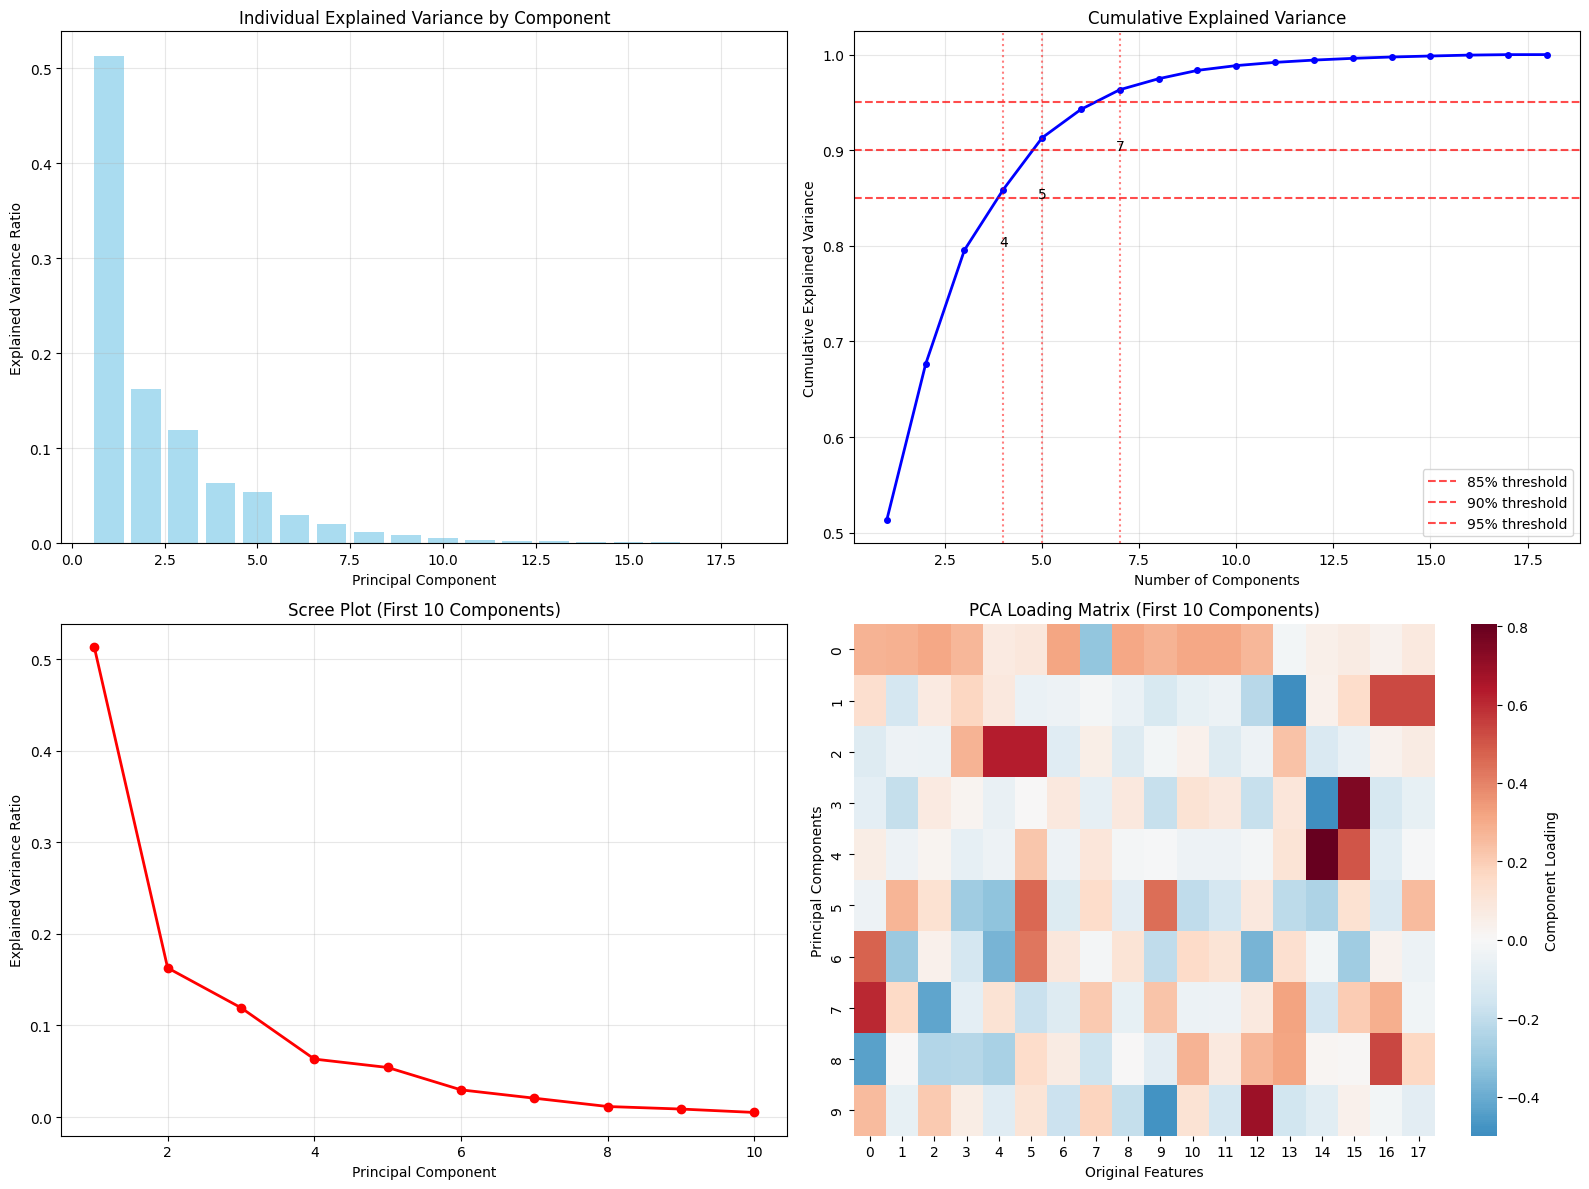


SECTION 3.3: OPTIMAL COMPONENT SELECTION
Determining optimal number of components based on multiple criteria...

🧪 TESTING DIFFERENT COMPONENT COUNTS FOR CLUSTERING:
   •  2 components: silhouette = 0.471
   •  3 components: silhouette = 0.428
   •  4 components: silhouette = 0.372
   •  5 components: silhouette = 0.336
   •  6 components: silhouette = 0.321
   •  7 components: silhouette = 0.310
   •  8 components: silhouette = 0.302
   •  9 components: silhouette = 0.299
   • 10 components: silhouette = 0.296
   • 11 components: silhouette = 0.295
   • 12 components: silhouette = 0.294
   • 13 components: silhouette = 0.293
   • 14 components: silhouette = 0.292

🎯 COMPONENT SELECTION METHODS:
   • Kaiser criterion (eigenvalue > 1): 4 components
   • Elbow method: 1 components
   • Business rule (90% variance): 5 components
   • Clustering-optimized: 2 components

⚖️  COMPONENT SELECTION DECISION:
   • Selected: 5 components
   • Rationale: Balances variance retention (91.3%) with d

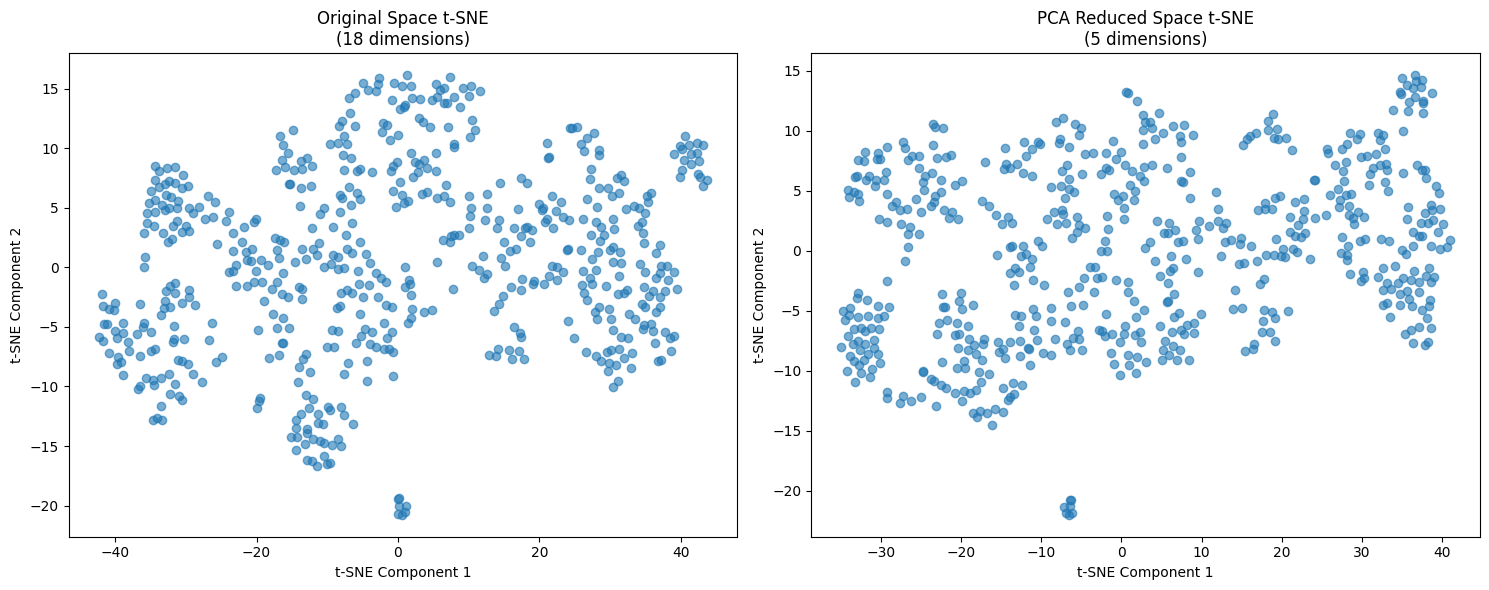


✅ SECTION 3 COMPLETED: Dimensionality reduction analysis finished
   • Optimal components selected: 5
   • Efficiency rating: EXCELLENT
   • Ready for clustering analysis


In [58]:
pca_full, feature_importance, n_original_features = pca_fit_analysis(X_train)
explained_variance_ratio, cumulative_variance, threshold_components = pca_variance_analysis(pca_full, feature_importance, n_original_features)
optimal_components, component_options, silhouette_scores = pca_optimal_component_selection(
    pca_full, explained_variance_ratio, cumulative_variance, threshold_components, X_train, n_original_features
)
pca_results = pca_efficiency_assessment(X_train, X_test, optimal_components, cumulative_variance, n_original_features)
